In [131]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

Params: n_papers = 1000, lr = 5, sm_runs_trsh = 0.99

# Comparison of the Baseline algorithms
### Dong vs Dawid vs MV

/Library/Python/2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


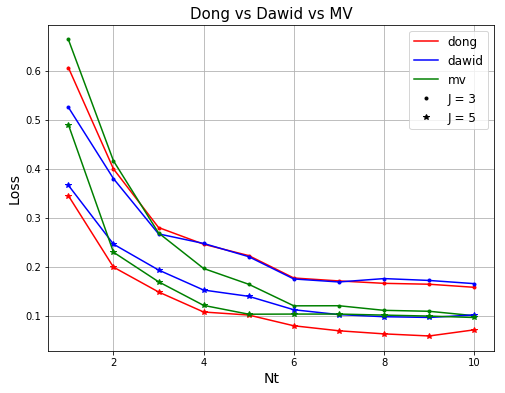

In [37]:
data = pd.read_csv('../output/data/dong_dawid_mv.csv')

fig, ax = plt.subplots(figsize=(8,6))
colors = ['red', 'blue', 'green']
plt.gca().set_color_cycle(colors)
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
J_arr = [3, 5]
algs_arr = ['dong', 'dawid', 'mv']
handles = []
# legend set up
for  alg, col in zip(algs_arr, colors):
    handles.append(mlines.Line2D([], [], color=col, marker='', label=alg))
handles.append(mlines.Line2D([], [], linestyle='none', color='black', marker='.', label='J = 3'))
handles.append(mlines.Line2D([], [], linestyle='none', color='black', marker='*', label='J = 5'))

def plot_alg(J, marker):
    for alg in algs_arr:
        y = data.loc[(data['alg'] == alg) & (data['J'] == J)]['loss_mean'].values
        plt.plot(x, y, label='J={},  '.format(J)+alg, marker=marker)

plot_alg(3, '.')
plot_alg(5, '*')
    
plt.title('Dong vs Dawid vs MV', size=15)
plt.xlabel('Nt', size=14)
plt.ylabel('Loss', size=14)
plt.legend(handles=handles, fontsize = 12)
plt.grid()

# Baseline vs Baseline-cr (that separate criteria)

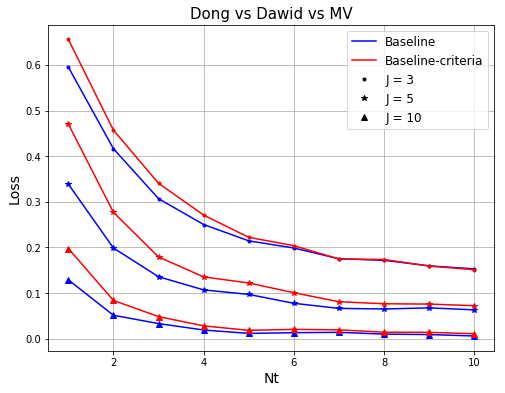

In [138]:
data = pd.read_csv('../output/data/baseline_vs_baseline_cr.csv')

fig, ax = plt.subplots(figsize=(8,6))
colors = ['blue', 'red']
plt.gca().set_color_cycle(colors)
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
algs_arr = ['Baseline', 'Baseline-criteria']
handles = []
# legend set up
for  alg, col in zip(algs_arr, colors):
    handles.append(mlines.Line2D([], [], color=col, marker='', label=alg))
handles.append(mlines.Line2D([], [], linestyle='none', color='black', marker='.', label='J = 3'))
handles.append(mlines.Line2D([], [], linestyle='none', color='black', marker='*', label='J = 5'))
handles.append(mlines.Line2D([], [], linestyle='none', color='black', marker='^', label='J = 10'))

def plot_alg(J, marker):
    for alg in algs_arr:
        y = data.loc[(data['alg'] == alg) & (data['J'] == J)]['loss_mean'].values
        plt.plot(x, y, label='J={},  '.format(J)+alg, marker=marker)

plot_alg(3, '.')
plot_alg(5, '*')
plot_alg(10, '^')
    
plt.title('Dong vs Dawid vs MV', size=15)
plt.xlabel('Nt', size=14)
plt.ylabel('Loss', size=14)
plt.legend(handles=handles, fontsize = 12)
plt.grid()

# 1. SM-runs convergence

Chart shows the number of unclassified papers after i interactions

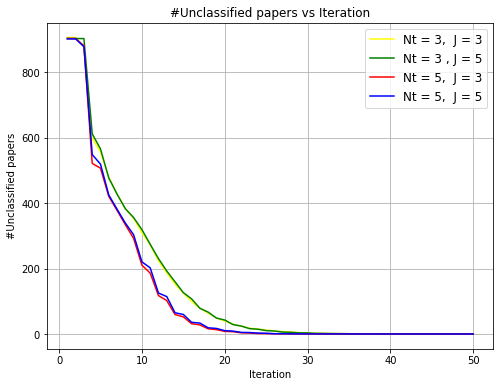

In [38]:
conv_data = pd.read_csv('../output/data/convergence_test.csv')

x_conv = range(1, 51)
y1 = conv_data.iloc[0].values[2:] #Nt=3 J=3
y2 = conv_data.iloc[1].values[2:] #Nt=3 J=5
y3 = conv_data.iloc[2].values[2:] #Nt=5 J=3
y4 = conv_data.iloc[3].values[2:] #Nt=5 J=5

fig, ax = plt.subplots(figsize=(8,6))
plt.gca().set_color_cycle(['yellow', 'green', 'red', 'blue', 'red'])
plt.plot(x_conv, y1)
plt.plot(x_conv, y2)
plt.plot(x_conv, y3)
plt.plot(x_conv, y4)
plt.legend(['Nt = 3,  J = 3', 'Nt = 3 , J = 5', 'Nt = 5,  J = 3', 'Nt = 5,  J = 5'], 
           loc='upper right', fontsize = 12)
plt.ylabel('#Unclassified papers')
plt.xlabel('Iteration')
plt.title('#Unclassified papers vs Iteration')
plt.grid()
plt.show()

# 2. SM-runs baseline round

The chart depicts Loss vs Price trade off for the proportion of papers p used in baseline iteration (p=0.1 means 10% from I). Each dot reflects the number of votes per criteria J. J = [1, ..., 10], lr = 5, sm_runs_trsh = 0.99, stop to iterate if within 5 iterations #Unclassified_papers remains the same.

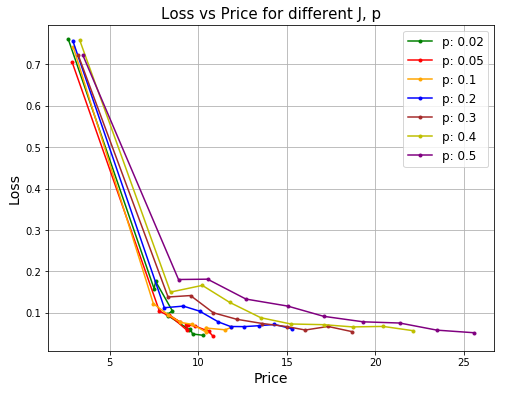

In [39]:
br = pd.read_csv('../output/data/baseline_round.csv')
br = br.loc[br['alg'] == 'SM-runs']

fig, ax = plt.subplots(figsize=(8,6))
plt.gca().set_color_cycle(['green', 'red', 'orange', 'blue', 'brown', 'y', 'purple'])
labels = br['fr_p'].unique()
for fr_p in labels:
    x = br.loc[br['fr_p'] == fr_p]['price_mean']
    y=br.loc[br['fr_p'] == fr_p]['loss_mean']
    plt.plot(x, y, label='p: {}'.format(fr_p), marker='.')
plt.title('Loss vs Price for different J, p', size=15)
plt.xlabel('Price', size=14)
plt.ylabel('Loss', size=14)
plt.legend(fontsize = 12)
plt.grid()

--> p = 0.05 (for n_papers = 1000) looks as the optimal choice.

# 3. Loss vs Nt

Loss vs Nt for baseline, M-runs, SM-runs. J = [3, 5], p = [0.1, 0.05], lr = 5, sm_runs_trsh = 0.99, stop to iterate if within 5 iterations #Unclassified_papers remains the same.

In [40]:
algs_arr = ['Baseline', 'SM-runs', 'M-runs']
colors = ['red', 'blue', 'green']
# legend set up
handles = []
labels = []
for alg, col in zip(algs_arr, colors):
    handles.append(mlines.Line2D([], [], color=col, marker='', label=alg))
    labels.append(alg)
handles.append(mlines.Line2D([], [], linestyle='none', color='black', marker='.'))
handles.append(mlines.Line2D([], [], linestyle='none', color='black', marker='*'))
labels.append('J = 3')
labels.append('J = 5')

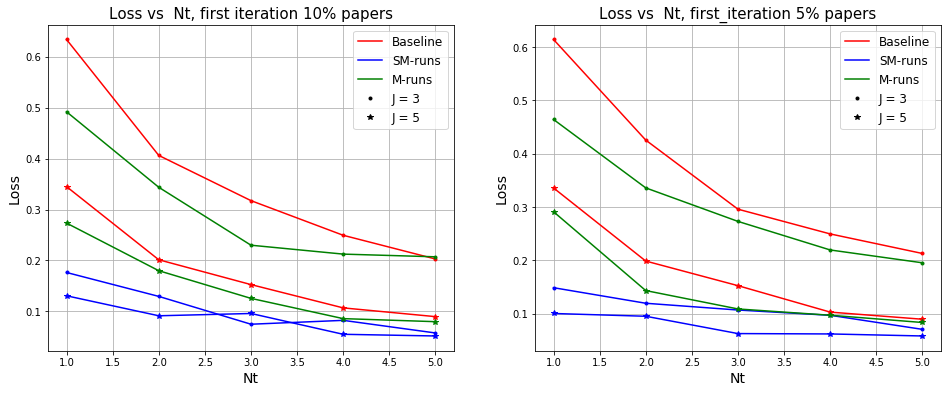

In [41]:
data = pd.read_csv('../output/data/loss_tests_lr5_fr01.csv')
data2 = pd.read_csv('../output/data/loss_tests_lr5_fr005.csv')

fig, ax = plt.subplots(nrows=1, ncols=2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(16,6))
ax[0].set_color_cycle(colors)
x = [1, 2, 3, 4, 5]
J_arr = [3, 5]

def plot_alg(data, J, marker, i):
    for alg in algs_arr:
        y = data.loc[(data['alg'] == alg) & (data['J'] == J)]['loss_mean'].values[:5]
        ax[i].plot(x, y, label='J={},  '.format(J)+alg, marker=marker)

plot_alg(data, 3, '.', 0)
plot_alg(data, 5, '*', 0)   
ax[0].set_title('Loss vs  Nt, first iteration 10% papers', size=15)
ax[0].set_xlabel('Nt', size=14)
ax[0].set_ylabel('Loss', size=14)
ax[0].legend(handles, labels, fontsize = 12)
ax[0].grid()

ax[1].set_color_cycle(colors)
plot_alg(data2, 3, '.', 1)
plot_alg(data2, 5, '*', 1)   
ax[1].set_title('Loss vs  Nt, first_iteration 5% papers', size=15)
ax[1].set_xlabel('Nt', size=14)
ax[1].set_ylabel('Loss', size=14)
ax[1].legend(handles, labels, fontsize = 12)
ax[1].grid()



# 4. F_beta vs Nt

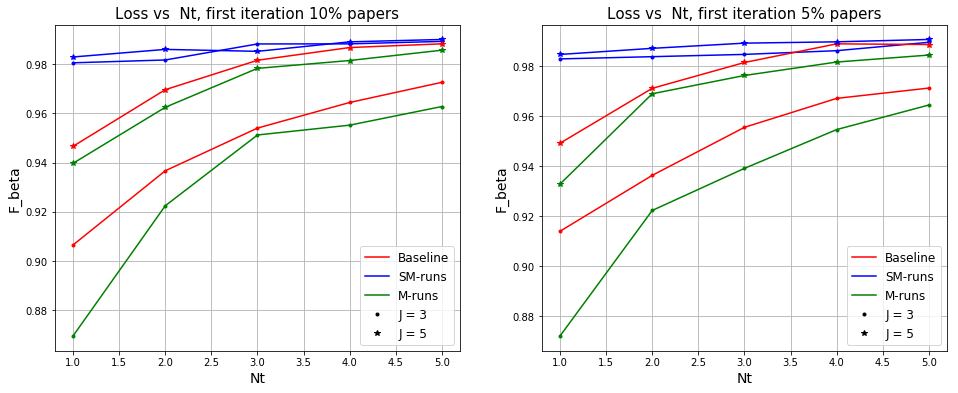

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(16,6))
ax[1].set_color_cycle(colors)
x = [1, 2, 3, 4, 5]
# x = range(1, 11)
J_arr = [3, 5]

def plot_alg(data, J, marker, i):
    for alg in algs_arr:
        y = data.loc[(data['alg'] == alg) & (data['J'] == J)]['f_beta'].values[:5]
        ax[i].plot(x, y, label='J={},  '.format(J)+alg, marker=marker)

plot_alg(data2, 3, '.', 1)
plot_alg(data2, 5, '*', 1)   
ax[1].set_title('Loss vs  Nt, first iteration 5% papers', size=15)
ax[1].set_xlabel('Nt', size=14)
ax[1].set_ylabel('F_beta', size=14)
ax[1].legend(handles, labels, fontsize = 12)
ax[1].grid()

ax[0].set_color_cycle(colors)
plot_alg(data, 3, '.', 0)
plot_alg(data, 5, '*', 0)   
ax[0].set_title('Loss vs  Nt, first iteration 10% papers', size=15)
ax[0].set_xlabel('Nt', size=14)
ax[0].set_ylabel('F_beta', size=14)
ax[0].legend(handles, labels, fontsize = 12)
ax[0].grid()

# 4. Loss vs Price

J = [3, 5, 10], Nt = [1,..., 10], p = 0.1, lr = 5, sm_runs_trsh = 0.99, stop to iterate if within 5 iterations #Unclassified_papers remains the same.

In [43]:
# legend set up
handles2 = []
labels2 = []
for alg, col in zip(algs_arr, colors):
    handles2.append(mlines.Line2D([], [], color=col, marker='', label=alg))
    labels2.append(alg)
for marker, lable in zip(['.', '*', '^'], ['J = 3', 'J = 5', 'J = 10']):
    handles2.append(mlines.Line2D([], [], linestyle='none', color='black', marker=marker))
    labels2.append(lable)

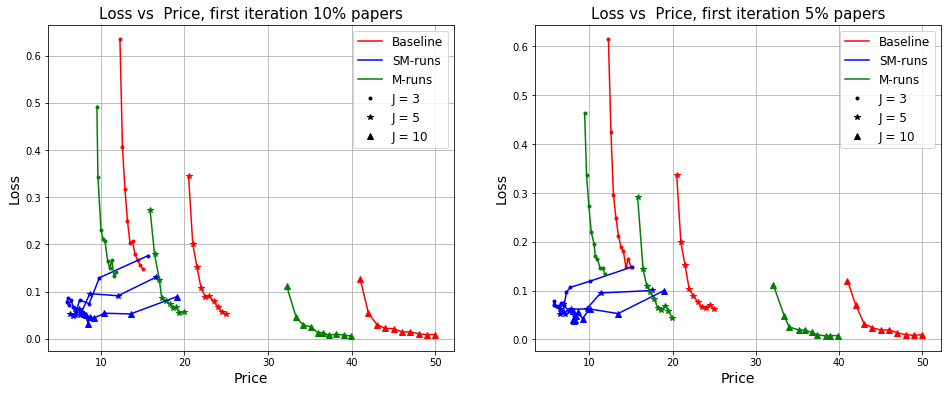

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(16,6))
ax[0].set_color_cycle(colors)
J = [3, 5, 10]
markers = ['.', '*', '^']

def plot_alg(data, J, marker, i):
    for alg in algs_arr:
        x = data.loc[(data['alg'] == alg) & (data['J'] == J)]['price_mean'].values
        y = data.loc[(data['alg'] == alg) & (data['J'] == J)]['loss_mean'].values
        ax[i].plot(x, y, label='J={},  '.format(J)+alg, marker=marker)

for j, marker in zip(J, markers):
    plot_alg(data, j, marker, 0)
ax[0].set_title('Loss vs  Price, first iteration 10% papers', size=15)
ax[0].set_xlabel('Price', size=14)
ax[0].set_ylabel('Loss', size=14)
ax[0].legend(handles2, labels2, fontsize = 12)
ax[0].grid()


ax[1].set_color_cycle(colors)
for j, marker in zip(J, markers):
    plot_alg(data2, j, marker, 1)
ax[1].set_title('Loss vs  Price, first iteration 5% papers', size=15)
ax[1].set_xlabel('Price', size=14)
ax[1].set_ylabel('Loss', size=14)
ax[1].legend(handles2, labels2, fontsize = 12)
ax[1].grid()

For Baseline, M-runs Nt=1 corresponds to the highest losses/lowest prices, Nt=10 to the lowest losses/highest prices. But for SM-runs Nt=10 corresponds to the lowest losses/prices! 

# 5. F_beta vs Price

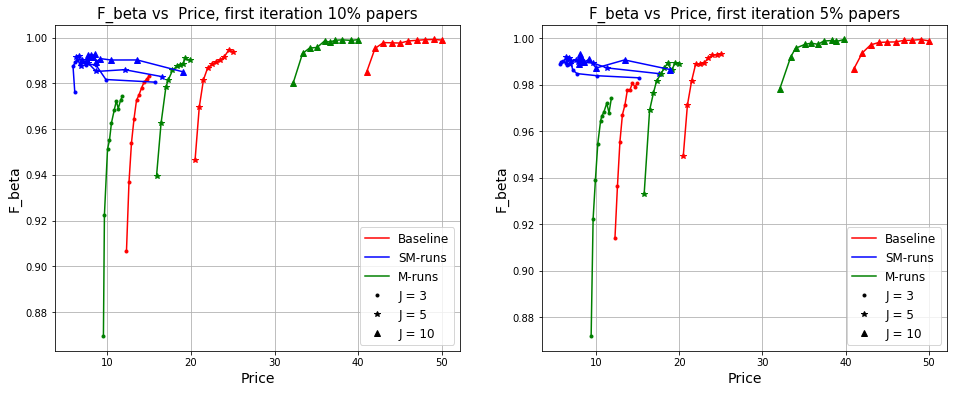

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(16,6))
ax[0].set_color_cycle(colors)
J = [3, 5, 10]

def plot_alg(data, J, marker, i):
    for alg in algs_arr:
        x = data.loc[(data['alg'] == alg) & (data['J'] == J)]['price_mean'].values
        y = data.loc[(data['alg'] == alg) & (data['J'] == J)]['f_beta'].values
        ax[i].plot(x, y, label='J={},  '.format(J)+alg, marker=marker)
        
for j, marker in zip(J, markers):
    plot_alg(data, j, marker, 0)
ax[0].set_title('F_beta vs  Price, first iteration 10% papers', size=15)
ax[0].set_xlabel('Price', size=14)
ax[0].set_ylabel('F_beta', size=14)
ax[0].legend(handles2, labels2, fontsize = 12)
ax[0].grid()

ax[1].set_color_cycle(colors)
for j, marker in zip(J, markers):
    plot_alg(data2, j, marker, 1)
ax[1].set_title('F_beta vs  Price, first iteration 5% papers', size=15)
ax[1].set_xlabel('Price', size=14)
ax[1].set_ylabel('F_beta', size=14)
ax[1].legend(handles2, labels2, fontsize = 12)
ax[1].grid()

# Loss vs Price investigation for SM-runs

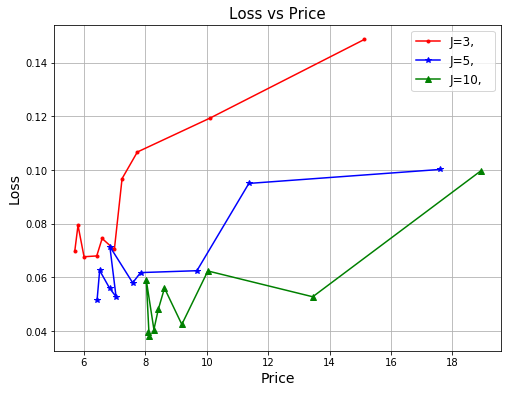

In [46]:
data = pd.read_csv('../output/data/loss_tests_lr5_fr005.csv')
data = data.loc[(data['alg'] == 'SM-runs')]

fig, ax = plt.subplots(figsize=(8,6))
plt.gca().set_color_cycle(colors)

def plot_alg(J, marker):
    y = data.loc[(data['J'] == J)]['loss_mean'].values
    x = data.loc[(data['J'] == J)]['price_mean'].values
    err = data.loc[(data['J'] == J)]['loss_std'].values
    plt.plot(x, y, label='J={},  '.format(J), marker=marker)
#     plt.errorbar(x, y, yerr=err, marker=marker)

plot_alg(3, '.')
plot_alg(5, '*')
plot_alg(10, '^')

plt.title('Loss vs Price', size=15)
plt.xlabel('Price', size=14)
plt.ylabel('Loss', size=14)
plt.legend(fontsize = 12)
plt.grid()

# The impact of accuracy errors

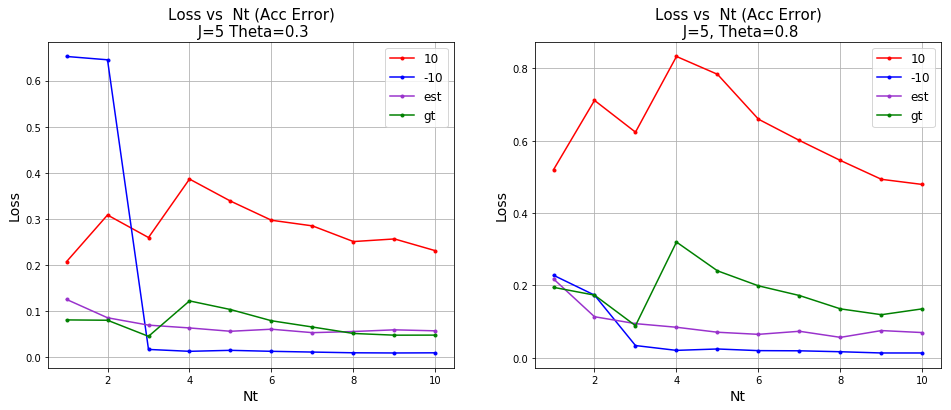

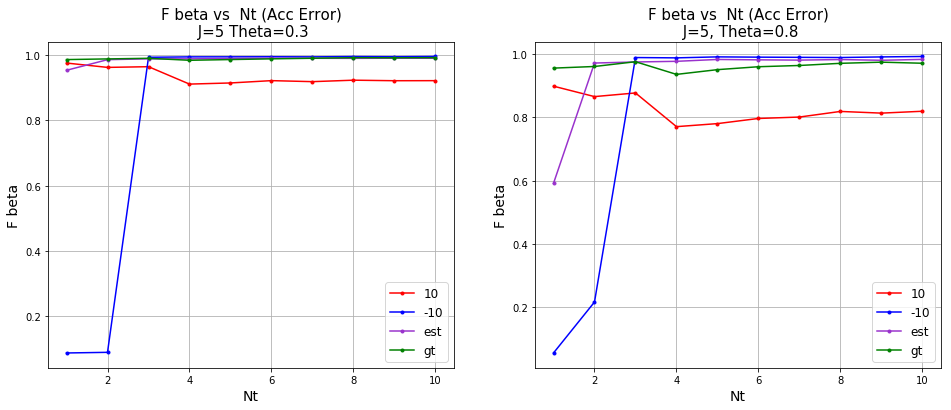

In [47]:
data = pd.read_csv('../output/data/accurcy_criteria_experiment.csv')
data = data.loc[(data['J'] == 5)]
colors = ['red', 'blue', 'darkorchid', 'green']
acc_terms = ['10', '-10', 'est', 'gt']
x = range(1, 11)

fig, ax = plt.subplots(nrows=1, ncols=2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(16,6))
# ax[0].set_color_cycle(['red', 'blue', 'green', 'tan', 'lime'])
# ax[1].set_color_cycle(['red', 'blue', 'green', 'tan', 'lime'])
# acc_terms = ['0.05', '-0.05', '0.1', '-0.1', 'None']
ax[0].set_color_cycle(colors)
ax[1].set_color_cycle(colors)

def plot_alg(data, marker, i, theta):
    for acc_term in acc_terms:
        y = data.loc[(data['acc_term'] == acc_term) & (data['theta'] == theta)]['loss_mean'].values
#         print acc_term, theta
#         print y
        err = data.loc[(data['acc_term'] == acc_term) & (data['theta'] == theta)]['loss_std'].values
        ax[i].plot(x, y, label=acc_term, marker=marker)
#         ax[i].errorbar(x, y, yerr=err, marker=marker)

plot_alg(data, '.', 0, 0.3)
ax[0].set_title('Loss vs  Nt (Acc Error)\n J=5 Theta=0.3', size=15)
ax[0].set_xlabel('Nt', size=14)
ax[0].set_ylabel('Loss', size=14)
ax[0].legend(fontsize = 12)
ax[0].grid()

plot_alg(data, '.', 1, 0.8)
ax[1].set_title('Loss vs  Nt (Acc Error)\n J=5, Theta=0.8', size=15)
ax[1].set_xlabel('Nt', size=14)
ax[1].set_ylabel('Loss', size=14)
ax[1].legend(fontsize = 12)
ax[1].grid()



# -------------------------------
fig, ax = plt.subplots(nrows=1, ncols=2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(16,6))
# ax[0].set_color_cycle(['red', 'blue', 'green', 'tan', 'lime'])
# ax[1].set_color_cycle(['red', 'blue', 'green', 'tan', 'lime'])
# acc_terms = ['0.05', '-0.05', '0.1', '-0.1', 'None']
ax[0].set_color_cycle(colors)
ax[1].set_color_cycle(colors)

def plot_alg(data, marker, i, theta):
    for acc_term in acc_terms:
        y = data.loc[(data['acc_term'] == acc_term) & (data['theta'] == theta)]['f_beta'].values
#         print acc_term, theta
#         print y
#         err = data.loc[(data['acc_term'] == acc_term) & (data['theta'] == theta)]['loss_std'].values
        ax[i].plot(x, y, label=acc_term, marker=marker)
#         ax[i].errorbar(x, y, yerr=err, marker=marker)

plot_alg(data, '.', 0, 0.3)
ax[0].set_title('F beta vs  Nt (Acc Error)\n J=5 Theta=0.3', size=15)
ax[0].set_xlabel('Nt', size=14)
ax[0].set_ylabel('F beta', size=14)
ax[0].legend(fontsize = 12)
ax[0].grid()

plot_alg(data, '.', 1, 0.8)
ax[1].set_title('F beta vs  Nt (Acc Error)\n J=5, Theta=0.8', size=15)
ax[1].set_xlabel('Nt', size=14)
ax[1].set_ylabel('F beta', size=14)
ax[1].legend(fontsize = 12)
ax[1].grid()

# The impact of power errors

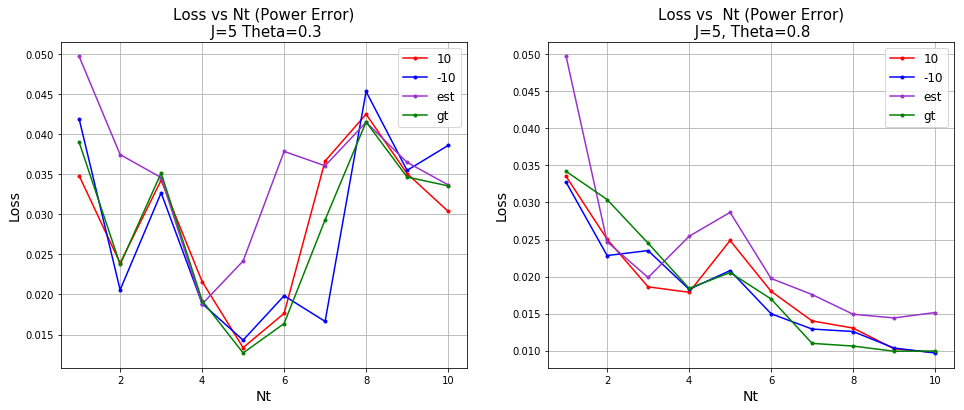

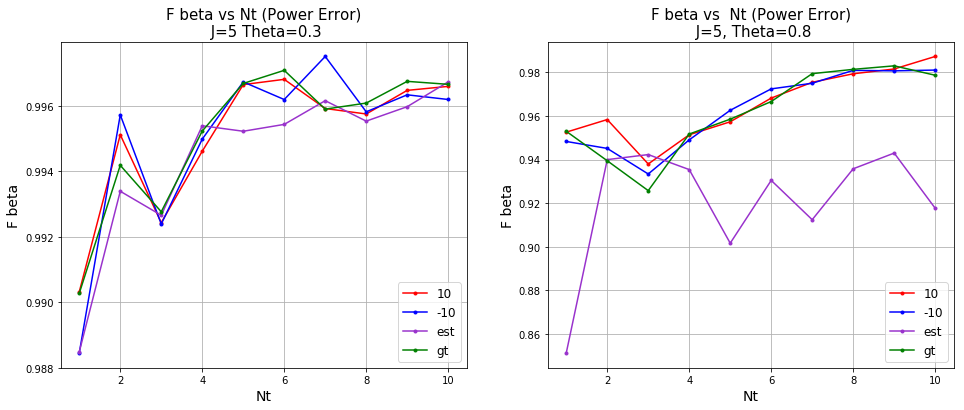

In [48]:
data = pd.read_csv('../output/data/power_criteria_experiment.csv')
data = data.loc[(data['J'] == 5)]
colors = ['red', 'blue', 'darkorchid', 'green']
pow_terms = ['10', '-10', 'est', 'gt']
x = range(1, 11)

fig, ax = plt.subplots(nrows=1, ncols=2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(16,6))
ax[0].set_color_cycle(colors)
ax[1].set_color_cycle(colors)
# x = [1, 2, 3, 4, 5]

def plot_alg(data, marker, i, theta):
    for pow_term in pow_terms:
        y = data.loc[(data['pow_term'] == pow_term) & (data['theta'] == theta)]['loss_mean'].values
#         err = data.loc[(data['pow_term'] == pow_term) & (data['theta'] == theta)]['loss_std'].values
        ax[i].plot(x, y, label=pow_term, marker=marker)
#         ax[i].errorbar(x, y, yerr=err, marker=marker)

plot_alg(data, '.', 0, 0.3)
ax[0].set_title('Loss vs Nt (Power Error)\n J=5 Theta=0.3', size=15)
ax[0].set_xlabel('Nt', size=14)
ax[0].set_ylabel('Loss', size=14)
ax[0].legend(fontsize = 12)
ax[0].grid()

plot_alg(data, '.', 1, 0.8)
ax[1].set_title('Loss vs  Nt (Power Error)\n J=5, Theta=0.8', size=15)
ax[1].set_xlabel('Nt', size=14)
ax[1].set_ylabel('Loss', size=14)
ax[1].legend(fontsize = 12)
ax[1].grid()


# ------------------------
fig, ax = plt.subplots(nrows=1, ncols=2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(16,6))
ax[0].set_color_cycle(colors)
ax[1].set_color_cycle(colors)
# x = [1, 2, 3, 4, 5]

def plot_alg(data, marker, i, theta):
    for pow_term in pow_terms:
        y = data.loc[(data['pow_term'] == pow_term) & (data['theta'] == theta)]['f_beta'].values
#         err = data.loc[(data['pow_term'] == pow_term) & (data['theta'] == theta)]['loss_std'].values
        ax[i].plot(x, y, label=pow_term, marker=marker)
#         ax[i].errorbar(x, y, yerr=err, marker=marker)

plot_alg(data, '.', 0, 0.3)
ax[0].set_title('F beta vs Nt (Power Error)\n J=5 Theta=0.3', size=15)
ax[0].set_xlabel('Nt', size=14)
ax[0].set_ylabel('F beta', size=14)
ax[0].legend(fontsize = 12)
ax[0].grid()

plot_alg(data, '.', 1, 0.8)
ax[1].set_title('F beta vs  Nt (Power Error)\n J=5, Theta=0.8', size=15)
ax[1].set_xlabel('Nt', size=14)
ax[1].set_ylabel('F beta', size=14)
ax[1].legend(fontsize = 12)
ax[1].grid()

# Presicion, Recall vs Nt, J

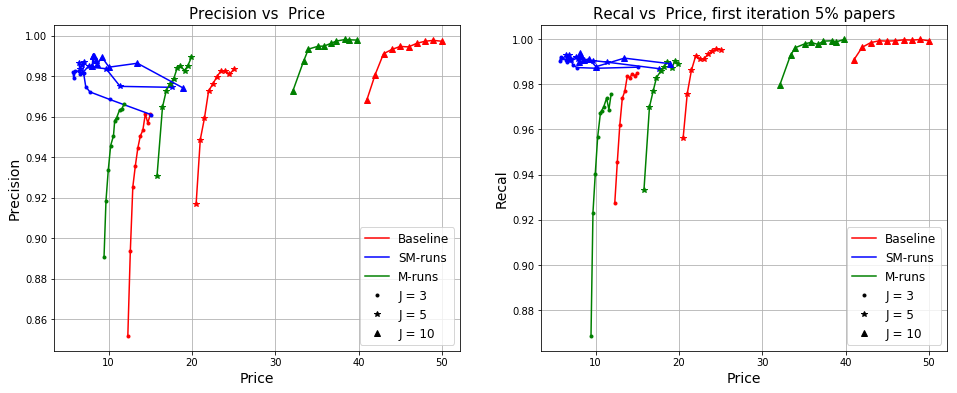

In [49]:
data = pd.read_csv('../output/data/loss_tests_lr5_fr005.csv')

colors = ['red', 'blue', 'green']
fig, ax = plt.subplots(nrows=1, ncols=2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(16,6))
ax[0].set_color_cycle(colors)
J = [3, 5, 10]

def plot_alg(data, J, marker, i, metric):
    for alg in algs_arr:
        x = data.loc[(data['alg'] == alg) & (data['J'] == J)]['price_mean'].values
        y = data.loc[(data['alg'] == alg) & (data['J'] == J)][metric].values
        ax[i].plot(x, y, label='J={},  '.format(J)+alg, marker=marker)

for j, marker in zip(J, markers):
    plot_alg(data, j, marker, 0, 'precision')        
ax[0].set_title('Precision vs  Price', size=15)
ax[0].set_xlabel('Price', size=14)
ax[0].set_ylabel('Precision', size=14)
ax[0].legend(handles2, labels2, fontsize = 12)
ax[0].grid()

ax[1].set_color_cycle(colors)
for j, marker in zip(J, markers):
    plot_alg(data, j, marker, 1, 'recall') 
ax[1].set_title('Recal vs  Price, first iteration 5% papers', size=15)
ax[1].set_xlabel('Price', size=14)
ax[1].set_ylabel('Recal', size=14)
ax[1].legend(handles2, labels2, fontsize = 12)
ax[1].grid()

# Vary papers per worker

In [50]:
data1 = pd.read_csv('../output/data/loss_tests_cr5_paper5_20worker.csv')
data1 =data1.loc[(data1['J'] == 5)] # 5 baselins vs 20 m_runs
data2 = pd.read_csv('../output/data/loss_tests_lr5_fr005.csv')
data2 = data2.loc[(data2['J'] == 5)] # 10 baselins vs 40 m_runs
data3 = pd.read_csv('../output/data/loss_tests_cr5_paper25_100worker.csv')
data3 =data3.loc[(data3['J'] == 5)] # 25 baselins vs 100 m_runs

In [51]:
colors = ['red', 'blue', 'green']
markers = ['^', '*', '.']
labels = ['5/20', '10/40', '25/100']
# legend set up
handles3 = []
labels3 = []
for alg, col in zip(algs_arr, colors):
    handles3.append(mlines.Line2D([], [], color=col, marker='', label=alg))
    labels3.append(alg)
for marker, lable in zip(markers, labels):
    handles3.append(mlines.Line2D([], [], linestyle='none', color='black', marker=marker))
    labels3.append(lable)

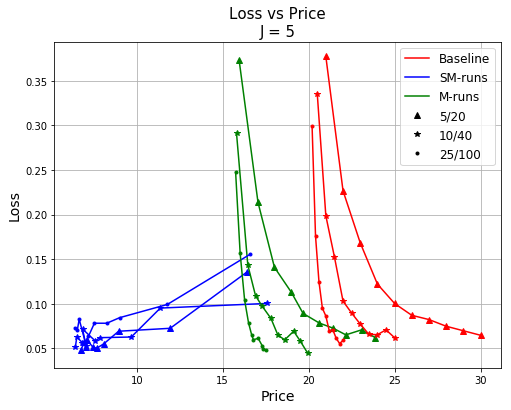

In [52]:
fig, ax = plt.subplots(figsize=(8,6))
plt.gca().set_color_cycle(colors)

def plot_alg(data, marker, label):
    for alg in algs_arr:
        x = data.loc[data['alg'] == alg]['price_mean']
        y = data.loc[data['alg'] == alg]['loss_mean']
        plt.plot(x, y, label=alg+' '+label, marker=marker)

for data, marker, label in zip([data1, data2, data3], markers, labels):
    plot_alg(data, marker, label)
    
plt.title('Loss vs Price\nJ = 5', size=15)
plt.xlabel('Price', size=14)
plt.ylabel('Loss', size=14)
plt.legend(handles3, labels3, fontsize = 12)
plt.grid()

# ROC curves

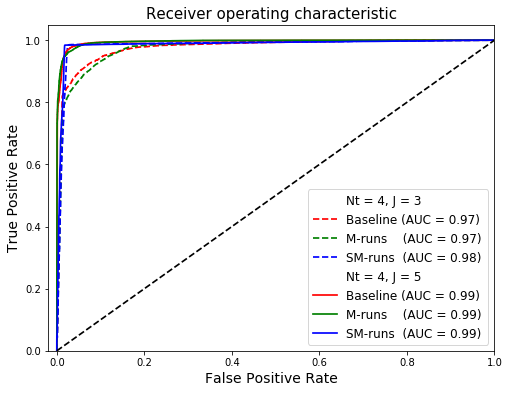

In [126]:
data = pd.read_csv('../output/data/roc_curves_nt4_j3.csv')
x_b = data['x_b'].dropna()
y_b = data['y_b'].dropna()
x_m = data['x_m'].dropna()
y_m = data['y_m'].dropna()
x_sm = data['x_sm'].dropna()
y_sm = data['y_sm'].dropna()
auc_b = data['auc_b'].dropna().values[0]
auc_m = data['auc_m'].dropna().values[0]
auc_sm = data['auc_sm'].dropna().values[0]

lw = 1.7
plt.figure(figsize=(8,6))
# Nt=4 J=3

handles = []
handles.append(mlines.Line2D([], [], linestyle='none', color='black', label='Nt = 4, J = 3                '))
handles.append(mlines.Line2D([], [], color='r', lw=lw, label='Baseline (AUC = %0.2f)' % auc_b, linestyle='--'))
handles.append(mlines.Line2D([], [], color='g', lw=lw, label='M-runs    (AUC = %0.2f)' % auc_m, linestyle='--'))
handles.append(mlines.Line2D([], [], color='b', lw=lw, label='SM-runs  (AUC = %0.2f)' % auc_sm, linestyle='--'))

plt.plot(x_b, y_b, color='r', lw=lw, linestyle='--')
plt.plot(x_m, y_m, color='g', lw=lw, linestyle='--')
plt.plot(x_sm, y_sm, color='b', lw=lw, linestyle='--')


# Nt=4 J=5
data = pd.read_csv('../output/data/roc_curves_nt4_j5.csv')
x_b = data['x_b'].dropna()
y_b = data['y_b'].dropna()
x_m = data['x_m'].dropna()
y_m = data['y_m'].dropna()
x_sm = data['x_sm'].dropna()
y_sm = data['y_sm'].dropna()
auc_b = data['auc_b'].dropna().values[0]
auc_m = data['auc_m'].dropna().values[0]
auc_sm = data['auc_sm'].dropna().values[0]

handles.append(mlines.Line2D([], [], linestyle='none', color='black', label='Nt = 4, J = 5                '))
handles.append(mlines.Line2D([], [], color='r', lw=lw, label='Baseline (AUC = %0.2f)' % auc_b))
handles.append(mlines.Line2D([], [], color='g', lw=lw, label='M-runs    (AUC = %0.2f)' % auc_m))
handles.append(mlines.Line2D([], [], color='b', lw=lw, label='SM-runs  (AUC = %0.2f)' % auc_sm))


plt.plot(x_b, y_b, color='r', lw=lw)
plt.plot(x_m, y_m, color='g', lw=lw)
plt.plot(x_sm, y_sm, color='b', lw=lw)
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',  size=14)
plt.ylabel('True Positive Rate',  size=14)
plt.title('Receiver operating characteristic',  size=15)
plt.legend(handles=handles,loc="lower right", fontsize = 12)
plt.show()